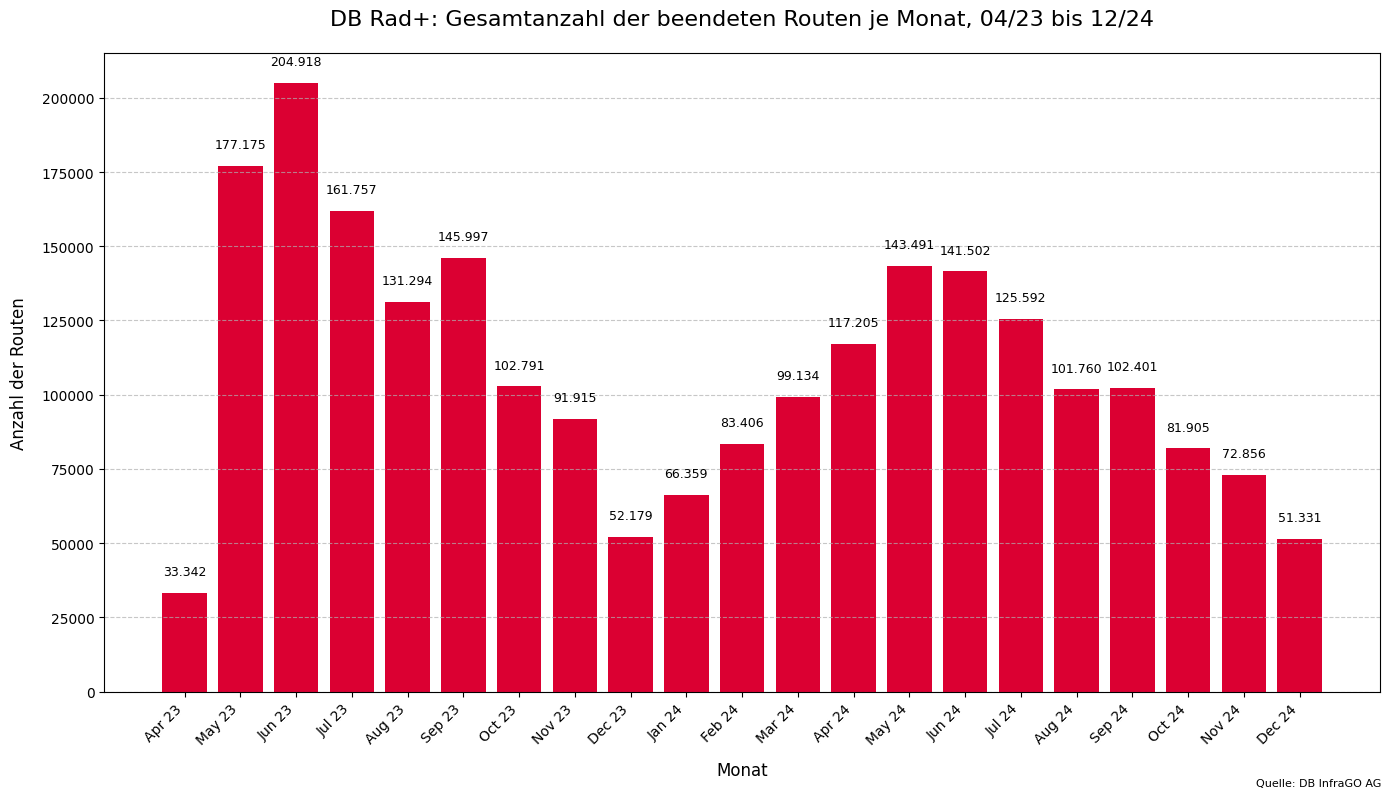

In [8]:
# Visualisierung DB Rad+ Routen je Monat, 04/23 bis 12/24
# Zur Erstellung des Codes wurde die generative Künstliche Intelligenz (KI) „Claude AI“ des Anbieters Anthropic in Version 3.7 genutzt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import os
from datetime import datetime
import matplotlib.dates as mdates
import os

# Define Output Dir
OUTPUT_DIR = "analysis_results/001_Routen_Rad+/"

# Create the output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

#---------- PART 1: DB RAD+ DATA HISTOGRAM ----------#

# Parse the DB Rad+ data
db_rad_data = {
    'Month': [
        'Apr 23', 'May 23', 'Jun 23', 'Jul 23', 'Aug 23', 'Sep 23', 
        'Oct 23', 'Nov 23', 'Dec 23', 'Jan 24', 'Feb 24', 'Mar 24', 
        'Apr 24', 'May 24', 'Jun 24', 'Jul 24', 'Aug 24', 'Sep 24', 
        'Oct 24', 'Nov 24', 'Dec 24'
    ],
    'Routes': [
        33342, 177175, 204918, 161757, 131294, 145997, 
        102791, 91915, 52179, 66359, 83406, 99134, 
        117205, 143491, 141502, 125592, 101760, 102401, 
        81905, 72856, 51331
    ]
}

# Create DataFrame for DB Rad+ data
db_df = pd.DataFrame(db_rad_data)

# Convert month strings to datetime objects for better plotting
db_df['Date'] = pd.to_datetime([f"01 {m}" for m in db_df['Month']], format="%d %b %y")

# Create a figure for DB Rad+ histogram
plt.figure(figsize=(14, 8))

# Create the histogram
bars = plt.bar(db_df['Month'], db_df['Routes'], color='#DB0032')  # Using DB red color

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the plot
plt.title('DB Rad+: Gesamtanzahl der beendeten Routen je Monat, 04/23 bis 12/24', fontsize=16, pad=20)
plt.xlabel('Monat', fontsize=12, labelpad=10)
plt.ylabel('Anzahl der Routen', fontsize=12, labelpad=10)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 5000,  # Offset the text a bit above the bar
        f'{height:,}'.replace(',', '.'),  # Format with dots as thousands separator
        ha='center', 
        va='bottom', 
        rotation=0,
        fontsize=9
    )

# Add source citation
plt.figtext(0.99, 0.01, 'Quelle: DB InfraGO AG', ha='right', fontsize=8)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(OUTPUT_DIR, "routen_je_monat.png"), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()